In [4]:
import numpy as np
#np.save('U_300.npy',U_300)
#np.save('V_300.npy',V_300)
U=np.load('U_300.npy')
V=np.load('V_300.npy')
print(U.shape)

(10103, 300)


In [74]:
print(V.shape)

(5880, 300)


In [5]:
from scipy import io
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp).T
print(X.shape)
X=zscore(X.T).T
print(X.shape)

(10103, 5880)
(10103, 5880)


0.9999149


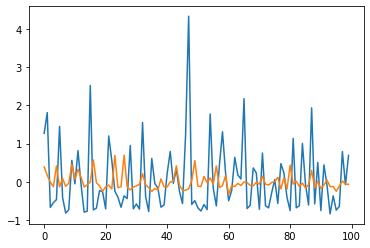

In [10]:
import matplotlib.pyplot as plt
plt.plot(X[0,:100])
print(np.std(X[0,:]))
plt.plot(V[0,:100])

In [41]:
print(U.shape)
list_of_neurons=np.nonzero(U[:,0])
print(list_of_neurons)
list_of_neurons=list(list_of_neurons[0])

(10103, 300)
(array([  36,   58,  180,  689,  882, 1039, 1165, 1428, 1489, 2018, 2754,
       3075, 3377, 3470, 5636, 5665, 7098]),)


36
58
(5880, 300)


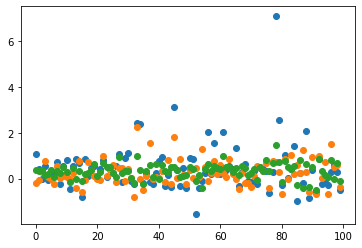

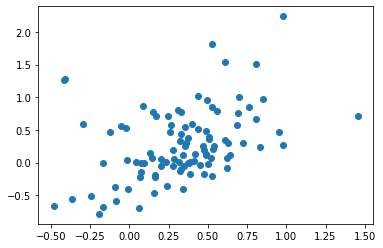

In [73]:
list_of_neurons_=[36,58]
for neuron in list_of_neurons_:
    print(neuron)
    plt.plot(X[neuron,:100],'o')
print(V.shape)
plt.plot(V[:100,0],'o')
plt.show()
plt.plot(V[:100,0],X[58,:100],'o')

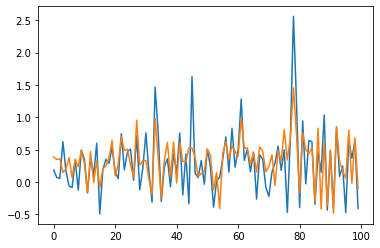

In [39]:
plt.plot(np.sum(X[list_of_neurons,:100],axis=0)/len(list_of_neurons))
plt.plot(V[:100,0])

No handles with labels found to put in legend.


(10103, 5880)
(10103, 300)
(5880, 300)
(100,)


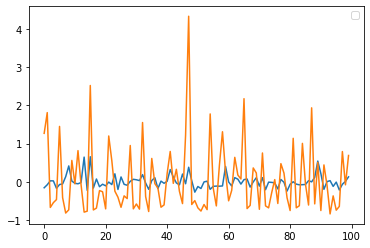

In [29]:
print(X.shape)
print(U.shape)
print(V.shape)
import matplotlib.pyplot as plt
mult=(U[0,:].T@V.T)[:100]
print(mult.shape)
plt.plot(mult)
plt.plot(X[0,:100])
plt.legend()

(10103, 300)
(array([  77,  436,  825, 1612, 1901, 2419, 2759, 2780, 3164, 3201, 3238,
       3249, 3315, 3340, 3344, 4115, 4587, 4630, 4829, 4864, 5083, 5168,
       5173, 5295, 6092, 6386, 6413, 6881, 6899, 6910, 6918, 6928, 7226,
       7315, 7510, 7532, 7561, 7709, 7728, 8149, 8206, 9772]),)
[[1.         0.07822013 0.19665855 ... 0.0457778  0.09954117 0.22293894]
 [0.07822013 1.         0.1855059  ... 0.22722228 0.09328103 0.10070021]
 [0.19665855 0.1855059  1.         ... 0.14836355 0.15700971 0.36233616]
 ...
 [0.0457778  0.22722228 0.14836355 ... 1.         0.15276767 0.062383  ]
 [0.09954117 0.09328103 0.15700971 ... 0.15276767 1.         0.1658039 ]
 [0.22293894 0.10070021 0.36233616 ... 0.062383   0.1658039  1.        ]]


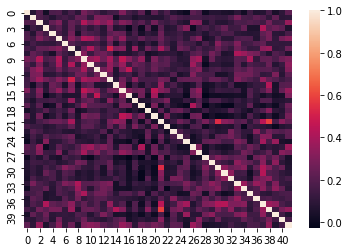

In [54]:
print(U.shape)
list_of_neurons=np.nonzero(U[:,3])
print(list_of_neurons)
list_of_neurons=list(list_of_neurons[0])
print(np.corrcoef(X[list_of_neurons,:]))
import seaborn as sns
sns.heatmap(np.corrcoef(X[list_of_neurons,:]))

In [49]:
baseline_v=np.mean(X[list_of_neurons[:3],:],axis=0)
print(baseline_v)
print(np.dot(baseline_v,X[list_of_neurons[4],:])/((baseline_v**2).sum()))

[ 0.18687554  0.07086147  0.05772653 ...  0.56522965 -0.58424824
  0.26450095]
0.45140868


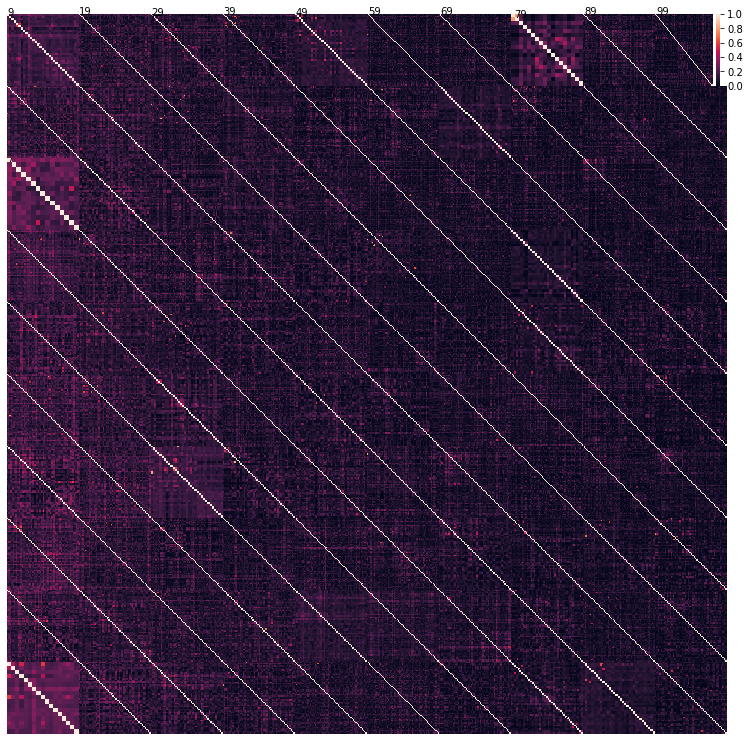

In [69]:
def plot_all_heatmaps(X,U):
    first_dim=10
    second_dim=10
    fig=plt.figure(figsize=(first_dim,second_dim))
    ax=[]
    i=0
    U=U[:,:100]
    U=U.reshape((U.shape[0],first_dim,second_dim))
    
    for ind1 in range(0,first_dim):
        for ind2 in range(0,second_dim):
            list_of_neurons=np.nonzero(U[:,ind1,ind2])[0]
            #print(list_of_neurons)
            ax=fig.add_axes([ind1/first_dim,ind2/second_dim,1./first_dim,1./second_dim]) 
            if ind1==9 and ind2==9:
                sns.heatmap(np.corrcoef(X[list_of_neurons,:]),ax=ax,vmin=0,vmax=1)
            else:
                sns.heatmap(np.corrcoef(X[list_of_neurons,:]),ax=ax,vmin=0,vmax=1,cbar_ax=None,cbar=None)
            
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(x=ind1/first_dim,y=ind2/second_dim,s=str(i))
            i+=1
           
    plt.show()
plot_all_heatmaps(X,U)